In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados_casas_bahia = pd.read_csv('output/dados_casas_bahia.csv', sep=';')
dados_amazon = pd.read_csv('../amazon/output/dados_amazon.csv')
dados_americanas = pd.read_csv('../americanas/output/dados_completos_americanas.csv', sep=';')
dados_magalu = pd.read_csv('../magazine_luiza/output/dados_magazine_luiza.csv', sep=';')

In [4]:
dados_casas_bahia.head()

,Descrição,TotalReviews,Estrelas,Preço,Loja,Categoria
0,Notebook Acer Core i5-10210U 8GB 512GB SSD Tel...,297,5.0,3999.0,Casas Bahia,Notebook
1,Notebook Samsung Dual Core 4GB 500GB Tela Full...,251,4.5,2349.0,Casas Bahia,Notebook
2,Notebook Positivo Intel Atom Quad Core 4GB 64G...,468,4.5,1519.9,Casas Bahia,Notebook
3,Notebook 2 em 1 Positivo Dual Core 4GB 64GB eM...,360,4.5,1699.0,Casas Bahia,Notebook
4,Notebook Samsung Core i3-1115G4 4GB 1TB Tela F...,272,4.5,3099.0,Casas Bahia,Notebook


In [5]:
dados_casas_bahia.shape

(1051, 6)

In [6]:
dados_casas_bahia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Descrição     1051 non-null   object 
 1   TotalReviews  1051 non-null   int64  
 2   Estrelas      1051 non-null   float64
 3   Preço         1051 non-null   float64
 4   Loja          1051 non-null   object 
 5   Categoria     1051 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 49.4+ KB


In [7]:
dados_casas_bahia.isna().sum()

Descrição       0
TotalReviews    0
Estrelas        0
Preço           0
Loja            0
Categoria       0
dtype: int64

# Análise Notebook

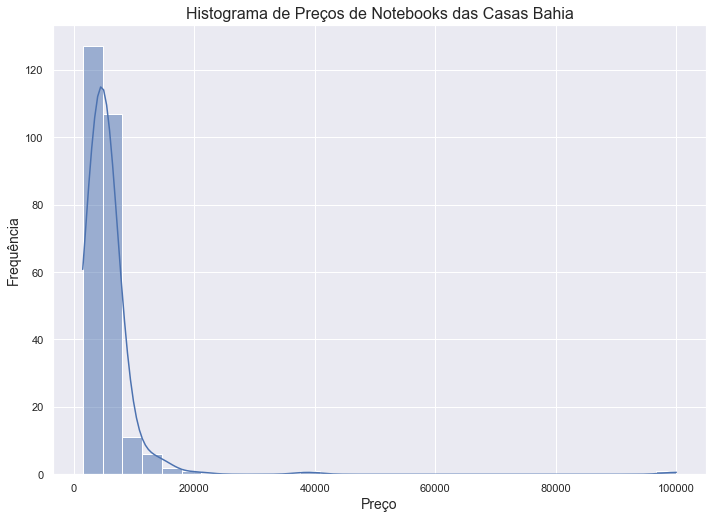

In [12]:
dados_note_casas_bahia = dados_casas_bahia[dados_casas_bahia['Categoria']=='Notebook']
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=dados_note_casas_bahia, x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebooks das Casas Bahia", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

In [13]:
dados_note_casas_bahia['Preço'].describe()

count      256.000000
mean      5564.992422
std       6785.912523
min       1487.900000
25%       3620.750000
50%       4799.000000
75%       5811.500000
max      99999.000000
Name: Preço, dtype: float64

## Visualização de Outliers

#### Casas Bahia

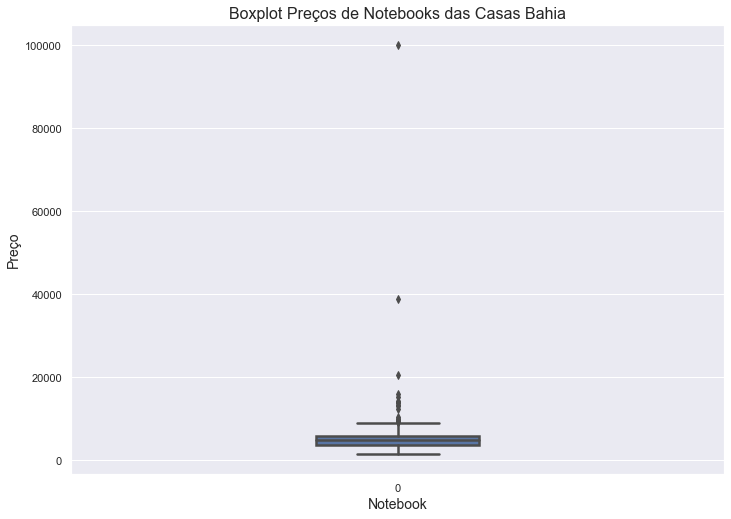

In [14]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=dados_note_casas_bahia['Preço'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Boxplot Preços de Notebooks das Casas Bahia", fontsize=16)
boxplot.set_xlabel("Notebook", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

### Remoção de Outliers

In [15]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices

def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df

In [16]:
# Removendo Outliers
outliers_index_list = outliers_indexes(dados_note_casas_bahia, 'Preço')
df_clean = remove_outliers(dados_note_casas_bahia, outliers_index_list)

In [17]:
df_clean.shape

(238, 6)

## Histograma: Distribuição de Frequência (Outliers removidos)

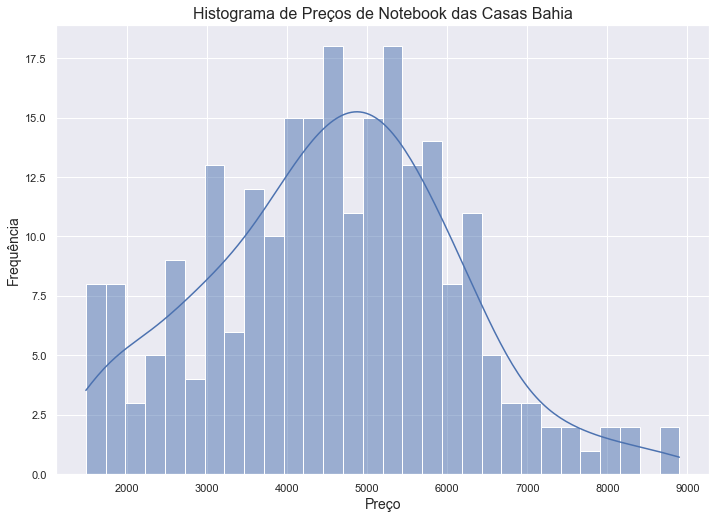

In [18]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df_clean, x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebook das Casas Bahia", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

In [19]:
df_clean.describe()

,TotalReviews,Estrelas,Preço
count,238.000000,238.000000,238.000000
mean,27.773109,1.495798,4561.726681
std,83.448454,2.217590,1539.743520
min,0.000000,0.000000,1487.900000
25%,0.000000,0.000000,3588.875000
50%,0.000000,0.000000,4674.000000
75%,6.750000,4.500000,5549.000000
max,559.000000,5.000000,8899.000000


In [20]:
dados_amazon['Categoria']

0        Notebook
1        Notebook
2        Notebook
3        Notebook
4        Notebook
          ...    
1000    Geladeira
1001    Geladeira
1002    Geladeira
1003    Geladeira
1004    Geladeira
Name: Categoria, Length: 1005, dtype: object

#### Amazon

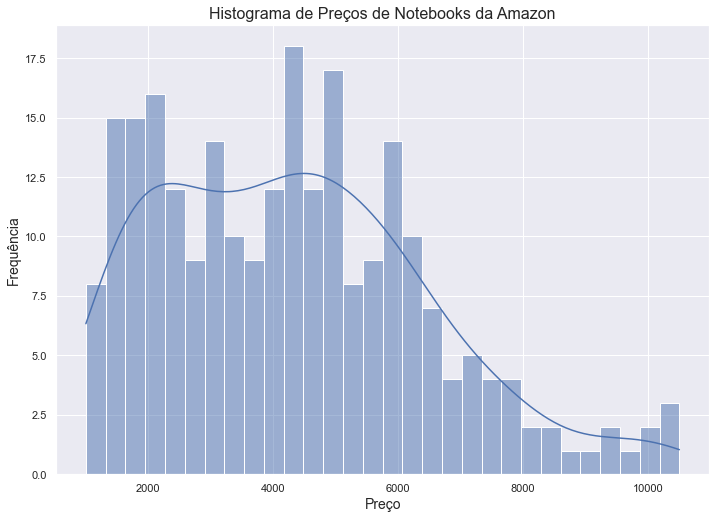

In [21]:
dados_note_amazon = dados_amazon[dados_amazon['Categoria']=='Notebook']
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=dados_note_amazon, x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebooks da Amazon", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

In [22]:
# Removendo Outliers
outliers_index_list = outliers_indexes(dados_note_amazon, 'Preço')
df_clean = remove_outliers(dados_note_amazon, outliers_index_list)

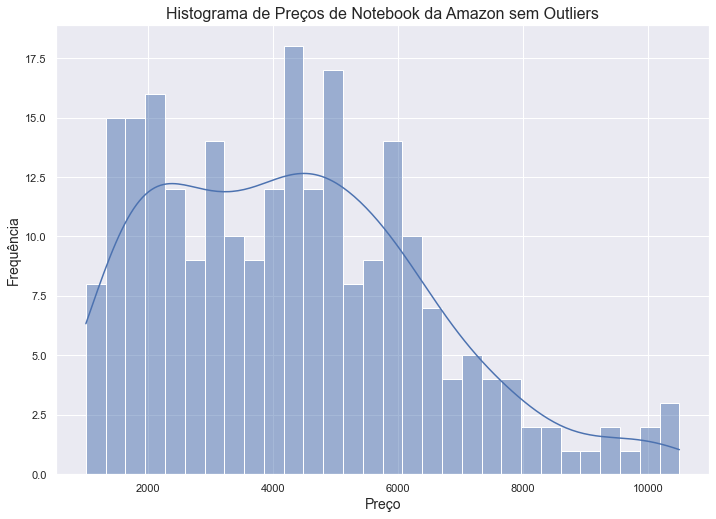

In [23]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df_clean, x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebook da Amazon sem Outliers", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

#### Americanas

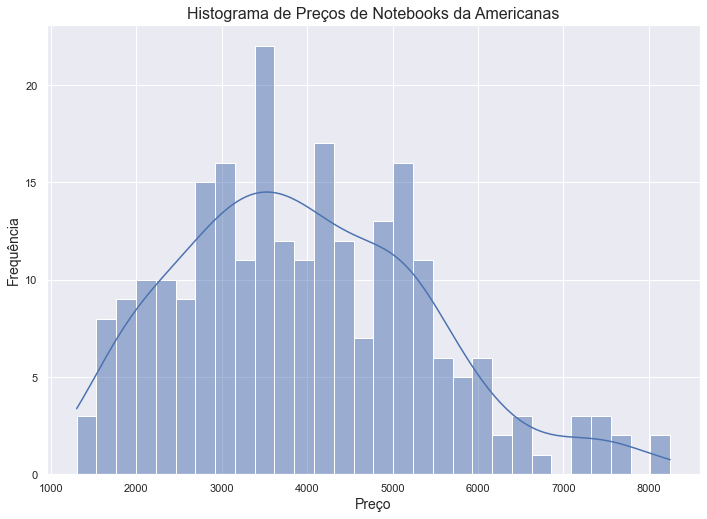

In [24]:
dados_note_americanas = dados_americanas[dados_americanas['Categoria']=='Notebook']
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=dados_note_americanas, x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebooks da Americanas", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

#### Comparando Quantidade de Avaliações

In [25]:
reviews_casas_bahia = dados_casas_bahia['TotalReviews'].sum()
reviews_americanas = dados_americanas['TotalReviews'].sum()
reviews_amazon = dados_amazon['TotalReviews'].sum()
reviews_magalu = dados_magalu['TotalReviews'].sum()

In [26]:
dict_reviews = {'Casas Bahia':dados_casas_bahia['TotalReviews'].sum(),
                'Americanas':dados_americanas['TotalReviews'].sum(),
                'Amazon':dados_amazon['TotalReviews'].sum(),
                'Magazine Luiza':dados_magalu['TotalReviews'].sum()
               }

In [27]:
n_reviews = pd.DataFrame.from_dict(dict_reviews, orient='index', columns=['Número de Reviews'])

In [28]:
n_reviews

,Número de Reviews
Casas Bahia,6689.0
Americanas,47299.0
Amazon,326999.0
Magazine Luiza,15562.0


## BUGOU MEU HIST PLOT

<AxesSubplot:ylabel='Número de Reviews'>

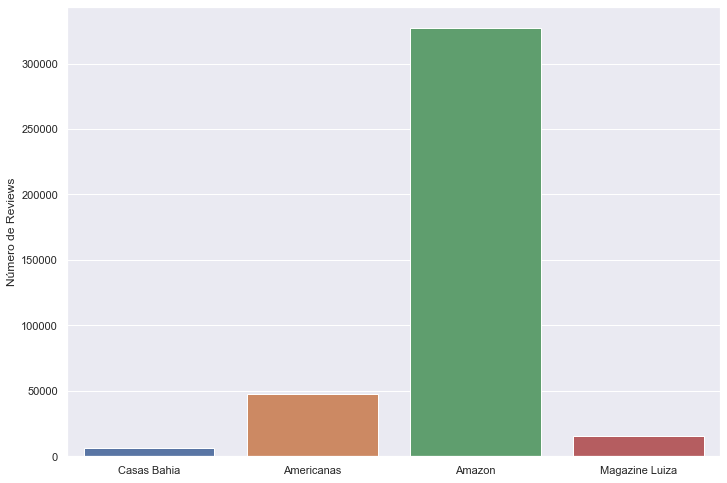

In [29]:
sns.barplot(data=n_reviews, x = n_reviews.index, y='Número de Reviews')